In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [2]:
data=pd.read_csv('titanic_dataset.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.shape

(891, 12)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
#The null values are found in columns Age,Cabin,Embarked

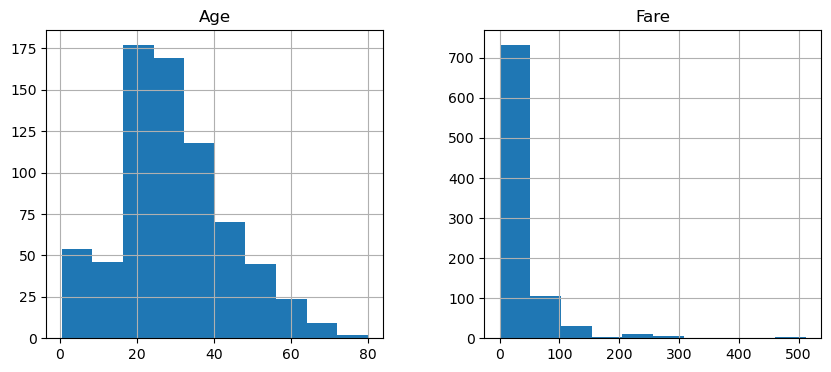

In [8]:
#Plot the distribution of column Age
freqgraph=data.select_dtypes(include=['float64'])
freqgraph.hist(figsize=(10,4))
plt.show()

In [9]:
#The distribution for the column 'Age' we obtained is a Right Skewed distribution.So we can replace the null values by median value.

In [10]:
data['Age']=data['Age'].fillna(data['Age'].median())

In [11]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
#Replacing the null values of 'Cabin' and 'Embarked' columns

data['Cabin']=data['Cabin'].fillna(data['Cabin'].mode)
data['Embarked']=data['Embarked'].fillna(data['Embarked'].mode)

In [13]:
data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [14]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,<bound method Series.mode of 0 NaN\n1 ...,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,<bound method Series.mode of 0 NaN\n1 ...,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,<bound method Series.mode of 0 NaN\n1 ...,S


# Outlier Detection

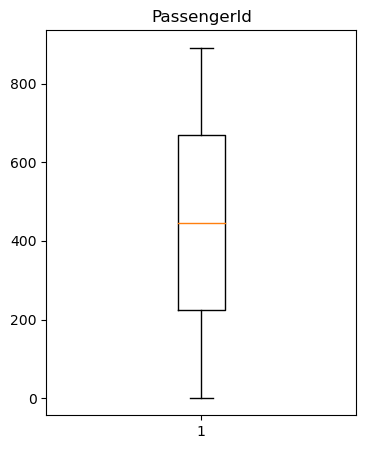

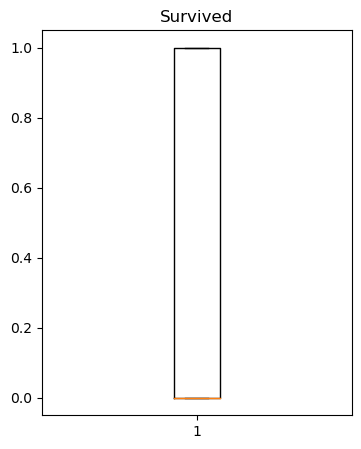

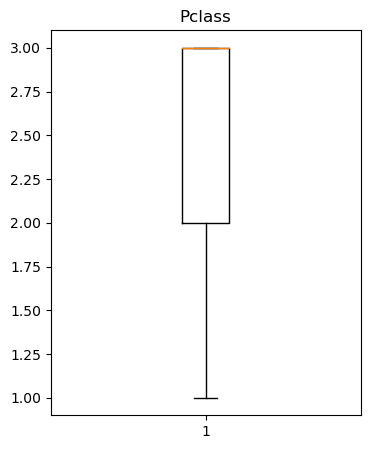

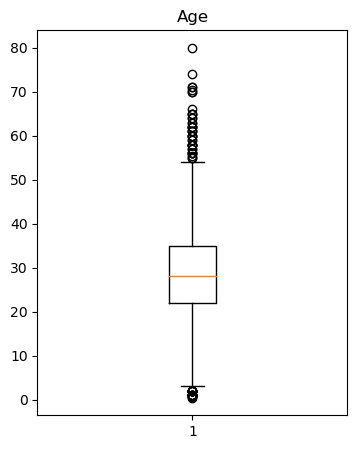

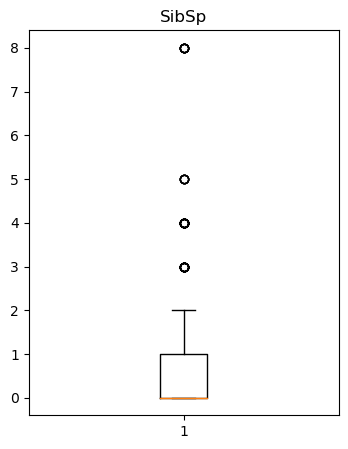

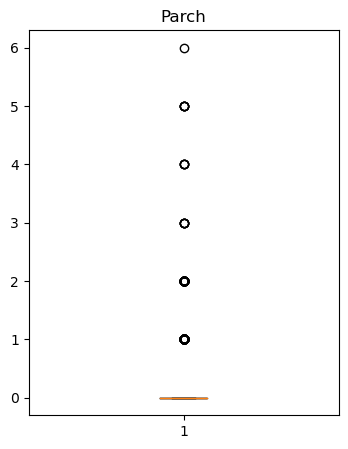

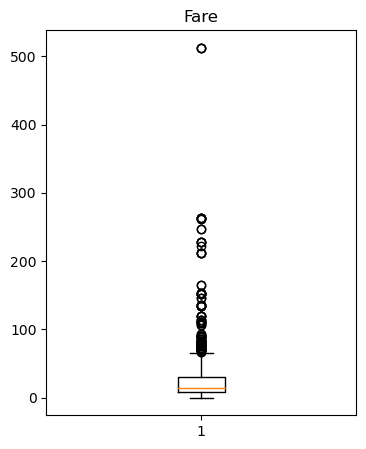

In [15]:
for i in ['PassengerId', 'Survived', 'Pclass','Age','SibSp','Parch','Fare']:
    plt.figure(figsize=(4,5))
    plt.boxplot(data[i])
    plt.title(i)

In [16]:
#The outliers are observed for columns 'Age','SibSp','Parch' and 'Fare' columns


#1.Age

#Finding the Q1,Q2,Q3

Q1=np.percentile(data['Age'],25,interpolation='midpoint')
Q2=np.percentile(data['Age'],50,interpolation='midpoint')
Q3=np.percentile(data['Age'],75,interpolation='midpoint')
print(Q1,Q2,Q3)


22.0 28.0 35.0


In [17]:
print(data['Age'].median())

28.0


In [18]:
#Finding the IQR

IQR=Q3-Q1

low_limit=Q1-1.5*IQR
up_limit=Q3+1.5*IQR

print(low_limit,up_limit)


2.5 54.5


In [19]:
#Finding the index of the outlier greater than upper limit

data.loc[data.Age>up_limit].index

Int64Index([ 11,  15,  33,  54,  94,  96, 116, 152, 170, 174, 195, 232, 252,
            268, 275, 280, 326, 366, 438, 456, 467, 483, 487, 492, 493, 545,
            555, 570, 587, 625, 626, 630, 647, 659, 672, 684, 694, 745, 772,
            829, 851, 879],
           dtype='int64')

In [20]:
#Finding the index of the outlier lesser than lower limit

data.loc[data.Age<low_limit].index

Int64Index([  7,  16,  78, 119, 164, 172, 183, 205, 297, 305, 340, 381, 386,
            469, 479, 530, 642, 644, 755, 788, 803, 824, 827, 831],
           dtype='int64')

In [21]:
#Replacing the outlier values with the median

data.loc[data.Age>up_limit,'Age']=np.median(data['Age'])
data.loc[data.Age<low_limit,'Age']=np.median(data['Age'])

#Rechecking whether there is any outlier present in 'Age' column
print(data.loc[data.Age>up_limit].index)
print(data.loc[data.Age<low_limit].index)

Int64Index([], dtype='int64')
Int64Index([], dtype='int64')


In [22]:
#2.SibSp

#Finding the Q1,Q2,Q3

Q1=np.percentile(data['SibSp'],25,interpolation='midpoint')
Q2=np.percentile(data['SibSp'],50,interpolation='midpoint')
Q3=np.percentile(data['SibSp'],75,interpolation='midpoint')
print(Q1,Q2,Q3)

0.0 0.0 1.0


In [23]:
print(data['SibSp'].median())

0.0


In [24]:
#Finding the IQR

IQR=Q3-Q1

low_limit=Q1-1.5*IQR
up_limit=Q3+1.5*IQR

print(low_limit,up_limit)

-1.5 2.5


In [25]:
#Finding the index of the outlier greater than upper limit

data.loc[data.SibSp>up_limit].index

Int64Index([  7,  16,  24,  27,  50,  59,  63,  68,  71,  85,  88, 119, 159,
            164, 171, 176, 180, 182, 201, 229, 233, 261, 266, 278, 324, 341,
            374, 386, 409, 480, 485, 541, 542, 634, 642, 683, 686, 726, 787,
            792, 813, 819, 824, 846, 850, 863],
           dtype='int64')

In [26]:
#Finding the index of the outlier lesser than lower limit

data.loc[data.SibSp<low_limit].index

Int64Index([], dtype='int64')

In [27]:
#Replacing the outlier values with the median

data.loc[data.SibSp>up_limit,'SibSp']=np.median(data['SibSp'])

#Rechecking whether there is any outlier present in 'SibSp' column
print(data.loc[data.SibSp>up_limit].index)

Int64Index([], dtype='int64')


In [28]:
#3.Parch

#Finding the Q1,Q2,Q3

Q1=np.percentile(data['Parch'],25,interpolation='midpoint')
Q2=np.percentile(data['Parch'],50,interpolation='midpoint')
Q3=np.percentile(data['Parch'],75,interpolation='midpoint')
print(Q1,Q2,Q3)

0.0 0.0 0.0


In [29]:
print(data['Parch'].median())

0.0


In [30]:
#Finding the IQR

IQR=Q3-Q1

low_limit=Q1-1.5*IQR
up_limit=Q3+1.5*IQR

print(low_limit,up_limit)

0.0 0.0


In [31]:
#Finding the index of the outlier greater than upper limit

data.loc[data.Parch>up_limit].index

Int64Index([  7,   8,  10,  13,  16,  24,  25,  27,  43,  50,
            ...
            855, 856, 858, 863, 869, 871, 879, 880, 885, 888],
           dtype='int64', length=213)

In [32]:
#Finding the index of the outlier lesser than lower limit

data.loc[data.Parch<low_limit].index

Int64Index([], dtype='int64')

In [33]:
#Replacing the outlier values with the median

data.loc[data.Parch>up_limit,'Parch']=np.median(data['Parch'])

#Rechecking whether there is any outlier present in 'Parch' column
print(data.loc[data.Parch>up_limit].index)

Int64Index([], dtype='int64')


In [34]:
#4.Fare

#Finding the Q1,Q2,Q3

Q1=np.percentile(data['Fare'],25,interpolation='midpoint')
Q2=np.percentile(data['Fare'],50,interpolation='midpoint')
Q3=np.percentile(data['Fare'],75,interpolation='midpoint')
print(Q1,Q2,Q3)

7.9104 14.4542 31.0


In [35]:
print(data['Fare'].median())

14.4542


In [36]:
#Finding the IQR

IQR=Q3-Q1

low_limit=Q1-1.5*IQR
up_limit=Q3+1.5*IQR

print(low_limit,up_limit)

-26.724 65.6344


In [37]:
#Finding the index of the outlier greater than upper limit

data.loc[data.Fare>up_limit].index

Int64Index([  1,  27,  31,  34,  52,  61,  62,  72,  88, 102,
            ...
            792, 802, 820, 829, 835, 846, 849, 856, 863, 879],
           dtype='int64', length=116)

In [38]:
#Finding the index of the outlier lesser than lower limit

data.loc[data.Fare<low_limit].index

Int64Index([], dtype='int64')

In [39]:
#Replacing the outlier values with the median

data.loc[data.Fare>up_limit,'Fare']=np.median(data['Fare'])

#Rechecking whether there is any outlier present in 'Fare' column
print(data.loc[data.Fare>up_limit].index)

Int64Index([], dtype='int64')


In [40]:
data['PassengerId'].nunique()

891

In [41]:
data1=data.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)

In [42]:
data1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,14.4542,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [43]:
Embarked=pd.get_dummies(data1['Embarked'],drop_first=True)

In [44]:
Sex=pd.get_dummies(data1['Sex'],drop_first=True)

In [45]:
data1=pd.concat([data1,Embarked,Sex],axis=1)

In [46]:
data1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,C,Q,S,male
0,0,3,male,22.0,1,0,7.2500,S,0,0,1,1
1,1,1,female,38.0,1,0,14.4542,C,1,0,0,0
2,1,3,female,26.0,0,0,7.9250,S,0,0,1,0
3,1,1,female,35.0,1,0,53.1000,S,0,0,1,0
4,0,3,male,35.0,0,0,8.0500,S,0,0,1,1


In [47]:
data1=data1.drop(['Embarked','Sex'],axis=1)

In [48]:
data1.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,C,Q,S,male
0,0,3,22.0,1,0,7.2500,0,0,1,1
1,1,1,38.0,1,0,14.4542,1,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1,0
3,1,1,35.0,1,0,53.1000,0,0,1,0
4,0,3,35.0,0,0,8.0500,0,0,1,1


In [49]:
data1.rename(columns={'C':'Embarked_C','Q':'Embarked_Q','S':'Embarked_S','male':'Sex'},inplace=True)

In [50]:
data1.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Sex
0,0,3,22.0,1,0,7.2500,0,0,1,1
1,1,1,38.0,1,0,14.4542,1,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1,0
3,1,1,35.0,1,0,53.1000,0,0,1,0
4,0,3,35.0,0,0,8.0500,0,0,1,1


In [51]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Age         891 non-null    float64
 3   SibSp       891 non-null    int64  
 4   Parch       891 non-null    int64  
 5   Fare        891 non-null    float64
 6   Embarked_C  891 non-null    uint8  
 7   Embarked_Q  891 non-null    uint8  
 8   Embarked_S  891 non-null    uint8  
 9   Sex         891 non-null    uint8  
dtypes: float64(2), int64(4), uint8(4)
memory usage: 45.4 KB


In [102]:
#Defining the feature and target columns

y=data1['Survived']
x=data1.drop('Survived',axis=1)

In [53]:
#Splitting the data to training and testing data

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [54]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

# kNN

In [55]:
from sklearn.neighbors import KNeighborsClassifier
metric_k=[]
warnings.simplefilter("ignore")
neighbors=np.arange(3,15)

for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski',p=2)
    model=classifier.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    metric_k.append(acc)

In [56]:
metric_k

[0.6815642458100558,
 0.6983240223463687,
 0.7150837988826816,
 0.7150837988826816,
 0.7039106145251397,
 0.6703910614525139,
 0.6815642458100558,
 0.6703910614525139,
 0.6703910614525139,
 0.664804469273743,
 0.6703910614525139,
 0.659217877094972]

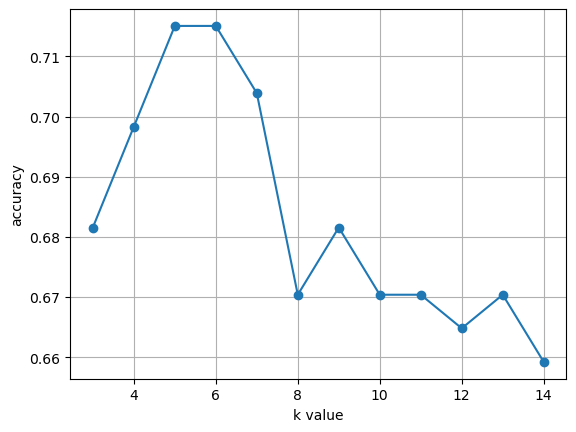

In [57]:
#Plot the k value against the accuracy

plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.grid()

In [58]:
#From the plot the highest accuracy is for the k value 5

classifier=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
model=classifier.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [59]:
#Evaluating the model

print('Accuracy=',accuracy_score(y_test,y_pred))
print('Precision=',precision_score(y_test,y_pred))
print('Recall=',recall_score(y_test,y_pred))
print('f1 score=',f1_score(y_test,y_pred))

Accuracy= 0.7150837988826816
Precision= 0.7017543859649122
Recall= 0.5405405405405406
f1 score= 0.6106870229007634


In [60]:
confusion_matrix(y_test,y_pred)

array([[88, 17],
       [34, 40]], dtype=int64)

# SVM

In [61]:
from sklearn.svm import SVC

svmclf=SVC(kernel='linear')
model_svm_linear=svmclf.fit(x_train,y_train)

In [62]:
y_pred_svm=model_svm_linear.predict(x_test)

from sklearn.metrics import accuracy_score,confusion_matrix

print('accuracy=',accuracy_score(y_test,y_pred_svm))
print(confusion_matrix(y_test,y_pred_svm))

accuracy= 0.7821229050279329
[[88 17]
 [22 52]]


In [63]:
from sklearn.svm import SVC
svmclf=SVC(kernel='rbf')
model_svm_rbf=svmclf.fit(x_train,y_train)

y_pred_svm=model_svm_rbf.predict(x_test)

from sklearn.metrics import accuracy_score,confusion_matrix

print('accuracy=',accuracy_score(y_test,y_pred_svm))
print(confusion_matrix(y_test,y_pred_svm))

accuracy= 0.6145251396648045
[[102   3]
 [ 66   8]]


In [64]:
from sklearn.svm import SVC
svmclf=SVC(kernel='poly')
model_svm_poly=svmclf.fit(x_train,y_train)

y_pred_svm=model_svm_poly.predict(x_test)

from sklearn.metrics import accuracy_score,confusion_matrix

print('accuracy=',accuracy_score(y_test,y_pred_svm))
print(confusion_matrix(y_test,y_pred_svm))

accuracy= 0.6368715083798883
[[103   2]
 [ 63  11]]


# Cross Validation

# 1. K-Fold Validation

In [65]:
# 1.K-Fold Validation is done for kNN model

In [66]:
from sklearn.model_selection import KFold

In [67]:
kfold_validator=KFold(10)

In [68]:
for train_index,test_index in kfold_validator.split(x,y):
    print('Training index:',train_index)
    print('Testing index:',test_index)

Training index: [ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287
 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305
 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323
 324 325 326 327 328 329 330 331 33

In [69]:
from sklearn.model_selection import cross_val_score

In [70]:
cv_score=cross_val_score(model,x,y,cv=kfold_validator)

In [71]:
cv_score

array([0.6       , 0.6741573 , 0.68539326, 0.69662921, 0.75280899,
       0.71910112, 0.73033708, 0.71910112, 0.73033708, 0.78651685])

In [72]:
np.mean(cv_score)

0.709438202247191

In [73]:
# 2. K-Fold Validation for SVM models

In [74]:
#1. kernel=linear

cv_score1=cross_val_score(model_svm_linear,x,y,cv=kfold_validator)

In [75]:
cv_score1

array([0.81111111, 0.82022472, 0.75280899, 0.84269663, 0.76404494,
       0.79775281, 0.74157303, 0.73033708, 0.84269663, 0.76404494])

In [76]:
np.mean(cv_score1)

0.786729088639201

In [77]:
#2.kernel=rbf

cv_score2=cross_val_score(model_svm_rbf,x,y,cv=kfold_validator)

In [78]:
cv_score2

array([0.56666667, 0.74157303, 0.61797753, 0.53932584, 0.60674157,
       0.6741573 , 0.61797753, 0.69662921, 0.70786517, 0.61797753])

In [79]:
np.mean(cv_score2)

0.638689138576779

In [80]:
# 3. kernel=polynomial

cv_score3=cross_val_score(model_svm_poly,x,y,cv=kfold_validator)

In [81]:
cv_score3

array([0.56666667, 0.71910112, 0.62921348, 0.56179775, 0.61797753,
       0.6741573 , 0.65168539, 0.65168539, 0.71910112, 0.69662921])

In [82]:
np.mean(cv_score3)

0.6488014981273408

# 2. Stratified K-Fold

In [83]:
# 1. Stratified K-Fold Validation for kNN model

In [84]:
from sklearn.model_selection import StratifiedKFold
skfold_validator=StratifiedKFold(n_splits=10)

In [85]:
for train_index,test_index in skfold_validator.split(x,y):
    print('Training index:',train_index)
    print('Testing index:',test_index)

Training index: [ 82  84  85  88  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287
 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305
 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323
 324 325 326 327 328 329 330 331 33

In [86]:
skcv_score=cross_val_score(model,x,y,cv=skfold_validator)

In [87]:
skcv_score

array([0.62222222, 0.64044944, 0.68539326, 0.73033708, 0.76404494,
       0.70786517, 0.75280899, 0.75280899, 0.71910112, 0.7752809 ])

In [88]:
np.mean(skcv_score)

0.7150312109862671

In [89]:
# 2. Stratified K-Fold Validation for SVM Models

In [90]:
#1.kernel=linear

skcv_score1=cross_val_score(model_svm_linear,x,y,cv=skfold_validator)

In [91]:
skcv_score1

array([0.81111111, 0.79775281, 0.76404494, 0.84269663, 0.79775281,
       0.7752809 , 0.76404494, 0.74157303, 0.80898876, 0.76404494])

In [92]:
np.mean(skcv_score1)

0.786729088639201

In [93]:
#2.kernel=rbf

skcv_score2=cross_val_score(model_svm_rbf,x,y,cv=skfold_validator)

In [94]:
skcv_score2

array([0.6       , 0.60674157, 0.60674157, 0.65168539, 0.64044944,
       0.65168539, 0.65168539, 0.68539326, 0.68539326, 0.59550562])

In [95]:
np.mean(skcv_score2)

0.6375280898876404

In [96]:
#3.kernel=polynomial

skcv_score3=cross_val_score(model_svm_poly,x,y,cv=skfold_validator)

In [97]:
skcv_score3

array([0.58888889, 0.62921348, 0.61797753, 0.66292135, 0.65168539,
       0.66292135, 0.69662921, 0.66292135, 0.6741573 , 0.6741573 ])

In [98]:
np.mean(skcv_score3)

0.652147315855181

In [99]:
# After K-Fold Validation and Stratified K-Fold Validation the best model is found to be SVM-linear model